In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
data1 = pd.read_csv('experiments/results/go_schema_2024-12-05_10-46-02.csv')
data2 = pd.read_csv('experiments/results/cs_schema_2_2024-12-09_11-39-37.csv')
data4 = pd.read_csv('experiments/results/cs_schema_2024-12-05_15-15-43.csv')
data3 = pd.read_csv('experiments/results/py_schema_2024-12-05_14-05-15.csv')

In [3]:
# List of datasets
datasets = {
    'go': data1,
    'cs_server': data4,
    'cs_workstation': data2,
    'py': data3
}

In [ ]:
for key, dataset in datasets.items():
    length = len(dataset)
    print(f"{key}: {(length / 600000)} min.")

In [ ]:
# Format of dataset
print(data1.head(10))

# Baseline data
The first 50000 (5 seconds) of data is used as baseline

In [5]:
# Baseline
baseline_length = 50000

# Extract the first 50000 entries as baseline
baselines = {
    'go_base': data1.iloc[:baseline_length],
    'cs_base': data2.iloc[:baseline_length],
    'py_base': data3.iloc[:baseline_length]
}

# Base statistics
for key, baseline in baselines.items():
    baseline_stats = baseline[['current', 'power', 'voltage']].describe()
    print(f"{key}:")
    print(f"{baseline_stats}")
    print()


go_base:
            current         power       voltage
count  50000.000000  50000.000000  50000.000000
mean       0.345609      1.728040      4.999983
std        0.004805      0.023999      0.000333
min        0.341680      1.708255      4.997627
25%        0.344565      1.722814      4.999766
50%        0.344852      1.724265      4.999984
75%        0.345218      1.726104      5.000204
max        0.483778      2.417840      5.001457

cs_base:
            current         power       voltage
count  50000.000000  50000.000000  50000.000000
mean       0.348182      1.740912      5.000010
std        0.004123      0.020597      0.000310
min        0.344279      1.721260      4.998055
25%        0.347128      1.735629      4.999805
50%        0.347394      1.736992      5.000010
75%        0.347787      1.738960      5.000218
max        0.413568      2.067478      5.001364

py_base:
            current         power       voltage
count  50000.000000  50000.000000  50000.000000
mean       

# Data

Overview of all 3 datasets, including median, mean, std, min, max, and range

## GO

In [6]:
go_rest = datasets['go'].iloc[baseline_length:]

In [7]:
# Base statistics
go_rest[['current', 'power', 'voltage']].describe()

,current,power,voltage
count,1.451619e+07,1.451619e+07,1.451619e+07
mean,4.414449e-01,2.207208e+00,5.000001e+00
std,8.555657e-02,4.276836e-01,5.861383e-04
min,3.414721e-01,1.707280e+00,4.991026e+00
25%,3.916382e-01,1.958238e+00,4.999781e+00
50%,4.000570e-01,2.000362e+00,5.000072e+00
75%,4.890464e-01,2.445126e+00,5.000333e+00
max,1.047217e+00,5.227444e+00,5.004632e+00


## CS

In [6]:
cs_rest = datasets['cs_server'].iloc[baseline_length:]
cs_rest2 = datasets['cs_workstation'].iloc[baseline_length:]

In [7]:
# Base statistics
cs_rest[['current', 'power', 'voltage']].describe()

,current,power,voltage
count,9.424720e+06,9.424720e+06,9.424720e+06
mean,4.247939e-01,2.123927e+00,5.000014e+00
std,6.895476e-02,3.444010e-01,8.732974e-04
min,3.407510e-01,1.703769e+00,4.990441e+00
25%,3.902558e-01,1.951457e+00,4.999721e+00
50%,3.927151e-01,1.963760e+00,5.000237e+00
75%,4.620597e-01,2.310293e+00,5.000568e+00
max,1.181691e+00,5.898033e+00,5.003126e+00


In [8]:
cs_rest2[['current', 'power', 'voltage']].describe()

,current,power,voltage
count,9.529150e+06,9.529150e+06,9.529150e+06
mean,4.009869e-01,2.004895e+00,5.000011e+00
std,6.566039e-02,3.279736e-01,8.376705e-04
min,3.443168e-01,1.721437e+00,4.989852e+00
25%,3.495532e-01,1.747918e+00,4.999649e+00
50%,3.603059e-01,1.801669e+00,5.000210e+00
75%,4.378956e-01,2.189328e+00,5.000565e+00
max,1.310238e+00,6.538074e+00,5.005614e+00


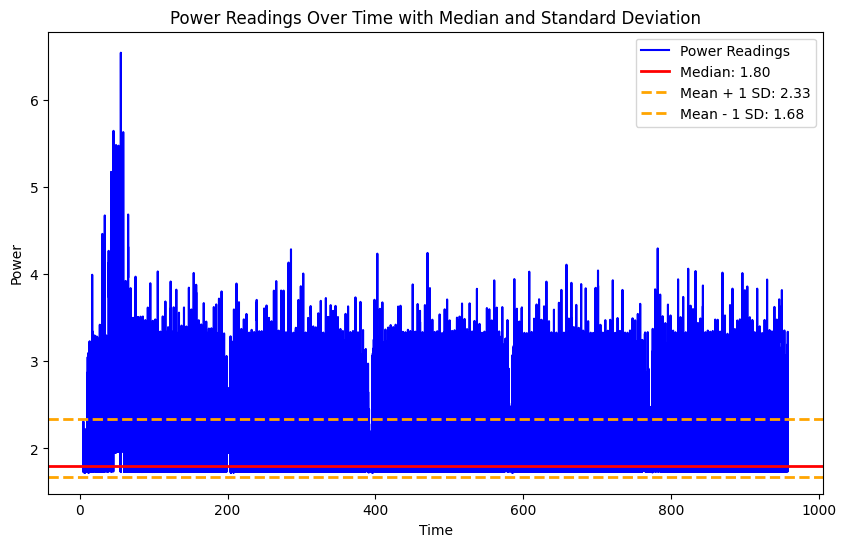

In [ ]:
# Assuming cs_rest2 is a pandas DataFrame with 'time' and 'power' columns
statistics = cs_rest2[['power']].describe()

# Plotting the power readings over time
plt.figure(figsize=(10, 6))
plt.plot(cs_rest2['seconds'], cs_rest2['power'], label='Power Readings', color='blue')

# Adding the median as a horizontal line
median = statistics.loc['50%', 'power']
plt.axhline(median, color='red', linestyle='-',  linewidth=2, label=f'Median: {median:.2f}')

# Adding standard deviation markers (mean ± std deviation)
mean = statistics.loc['mean', 'power']
std_dev = statistics.loc['std', 'power']
plt.axhline(mean + std_dev, color='orange', linewidth=2, linestyle='--', label=f'Mean + 1 SD: {mean + std_dev:.2f}')
plt.axhline(mean - std_dev, color='orange', linewidth=2, linestyle='--', label=f'Mean - 1 SD: {mean - std_dev:.2f}')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Readings Over Time with Median and Standard Deviation')

# Show legend
plt.legend()

# Display the plot
plt.show()


## PY

In [13]:
py_rest = datasets['py'].iloc[baseline_length:]

In [14]:
# Base statistics
py_rest[['current', 'power', 'voltage']].describe()

,current,power,voltage
count,1.589801e+07,1.589801e+07,1.589801e+07
mean,4.559667e-01,2.279805e+00,5.000000e+00
std,6.202865e-02,3.099141e-01,7.322665e-04
min,3.444316e-01,1.722201e+00,4.993073e+00
25%,3.996959e-01,1.998716e+00,4.999562e+00
50%,4.586928e-01,2.293377e+00,5.000087e+00
75%,4.911960e-01,2.455765e+00,5.000525e+00
max,1.034818e+00,5.167323e+00,5.003691e+00


In [ ]:
# generate avg of power consumption for all 4 datasets


# Deviation data

In [ ]:

# Analyze deviations from the baseline
# Calculate percentage deviation from baseline
metrics = ['current', 'power', 'voltage']
for key, dataset in datasets.items():
    baseline = baselines[f'{key}_base']
    rest = dataset.loc[baseline_length:]
    
    print(f"{key}:")
    for metric in metrics:
        baseline_mean = baseline[metric].mean()
        rest[f'{metric}_percent_deviation'] = ((rest[metric] - baseline_mean) / baseline_mean) * 100
        print(f"{metric}:")
        print(rest[f'{metric}_percent_deviation'].describe())
    
    

# Energy consumption

In [ ]:
def calculate_energy(df):
    times = df['seconds']
    powers = df['power']
    energy = np.trapz(powers, times)  # Trapezoidal integration
    duration = times.iloc[-1] - times.iloc[0]
    avg_power = energy / duration if duration > 0 else 0
    return energy, avg_power

# Calculate energy and average power for each dataset
results = {}
for name, data in datasets.items():
    energy, avg_power = calculate_energy(data)
    results[name] = {'total_energy_joules': energy, 'average_power_watts': avg_power}

# Print results
for name, metrics in results.items():
    print(f"Dataset: {name}")
    print(f"  Total Energy (Joules): {metrics['total_energy_joules']:.6f}")
    print(f"  Average Power (Watts): {metrics['average_power_watts']:.6f}")
    print()

In [ ]:
calculate_energy(baselines['cs_base'])

# Output

In [ ]:
# Ensure the output directory exists
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)

# Save individual plots
metrics = ['current', 'power', 'voltage']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(rest.index, rest[f'{metric}_percent_deviation'],
             label=f'{metric.capitalize()} Deviation (%)')
    plt.xlabel('Index')
    plt.ylabel('Percentage Deviation')
    plt.legend()
    plt.title(f'{metric.capitalize()} Percentage Deviation from Baseline')
    file_path = os.path.join(output_dir, f'{metric}_deviation_plot.png')
    plt.savefig(file_path, dpi=300)  # Save the plot with high resolution
    plt.close()  # Close the plot to free memory

print(f"Plots saved in the '{output_dir}' folder.")


In [ ]:
powers = [df['power'].values for df in datasets.values()]
labels = list(datasets.keys())

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(powers, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), showfliers=False)

# Add labels and title
plt.title('Power Usage Across Datasets', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Power (Watts)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [2]:

# List of datasets
datasets = {
    'py': data3,
    'go': data1,
    'cs_server': data4,
    'cs_workstation': data2,
    

}
colors = ['blue', 'green', 'teal', 'purple']  # Different colors for each dataset
labels = ['Python Django','Go HTTP', 'ASP.NET GC1', 'ASP.NET GC2', ]  # Labels for the legend

for name, df in datasets.items():
    df['minute'] = (df['seconds'] // 60).astype(int)  # Convert seconds to minutes
    grouped = df.groupby('minute')['power'].mean().reset_index()
    datasets[name] = grouped

# Plotting
plt.figure(figsize=(8, 6))



for i, (name, df) in enumerate(datasets.items()):
    plt.plot(df['minute'], df['power'], label=labels[i] , color=colors[i], marker='o')

# Add labels and title
plt.title('Average Power Usage Grouped by Minute', fontsize=14)
plt.xlabel('Minute', fontsize=12)
plt.ylabel('Average Power (Watts)', fontsize=12)
plt.legend(title='Dataset') 
plt.grid(True)

# Show the plot
# plt.tight_layout()

output_dir = 'plots'
file_path = os.path.join(output_dir, 'power_usage_by_minute_plot.pdf')
plt.savefig(file_path, dpi=500)  # Save the plot with high resolution
plt.close()  # Close the plot to free memory

In [ ]:
# Plotting all datasets in one plot
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']  # Define colors for each dataset

# # Plot each dataset
# for i, (name, df) in enumerate(datasets.items()):
#     plt.plot(df['seconds'], df['power'], label=name, color=colors[i])

# Plot 'cs' dataset over 'py' dataset with some transparency
# Plot 'go' dataset normally
plt.plot(datasets['go']['seconds'], datasets['go']['power'], label='go', color=colors[0])
plt.plot(datasets['py']['seconds'], datasets['py']['power'], label='py', color=colors[2])
plt.plot(datasets['cs']['seconds'], datasets['cs']['power'], label='cs', color=colors[1])



# Add labels, title, and legend
plt.title('Power Usage Over Time', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Power (Watts)', fontsize=12)
plt.legend(title='Dataset')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
data1 = pd.read_csv('experiments/results/go_schema_2024-12-05_10-46-02.csv')
data2 = pd.read_csv('experiments/results/cs_schema_2_2024-12-09_11-39-37.csv')
data4 = pd.read_csv('experiments/results/cs_schema_2024-12-05_15-15-43.csv')
data3 = pd.read_csv('experiments/results/py_schema_2024-12-05_14-05-15.csv')

# Create subplots
#fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=True, sharey=True)

# Define colors for each dataset
datasets = {
    'py': data3,
    'go': data1,
    'cs_server': data4,
    'cs_workstation': data2
}
colors = ['blue', 'green', 'teal', 'purple']  # Different colors for each dataset
labels = ['Python Django','Go HTTP', 'ASP.NET GC1', 'ASP.NET GC2', ]  # Labels for the legend
xticks = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600]
yticks = [2, 3, 4, 5, 6]
output_dir = 'plots'
# Plot each dataset on its respective subplot
for i, (name, df) in enumerate(datasets.items()):

    plt.figure(figsize=(8, 2.5))

    plt.plot(df['seconds'], df['power'], label=labels[i], color=colors[i])
    if (i == 0):
        plt.title('Power Usage Over Time')
    

    statistics = df[['power']].describe()
    median = statistics.loc['50%', 'power']
    plt.axhline(median, color='red', linestyle='-',  linewidth=1, label=f'Median: {median:.2f}')

    # Adding standard deviation markers (mean ± std deviation)
    mean = statistics.loc['mean', 'power']
    std_dev = statistics.loc['std', 'power']
    plt.axhline(mean + std_dev, color='orange', linewidth=1, linestyle='--', label=f'Mean + 1 SD: {mean + std_dev:.2f}')
    plt.axhline(mean - std_dev, color='orange', linewidth=1, linestyle='--', label=f'Mean - 1 SD: {mean - std_dev:.2f}')

    plt.ylim(1.5, 6.8)
    plt.xlim(-100, 1700)

    plt.ylabel('Power (Watts)')
    if (i == 3):
        plt.xlabel('Time (seconds)')
    #plt.xlabel('Time (seconds)')
    #plt.xticks(xticks)
    plt.yticks(yticks)
    plt.grid(True)
    plt.legend()
    plt.tight_layout(
        pad=0
    )
  
    file_path = os.path.join(output_dir, f'measurements_2_{labels[i]}.pdf')
    plt.savefig(file_path, dpi=500)  # Save the plot with high resolution
    plt.close() 

/tmp/ipykernel_25737/3132687557.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(
/tmp/ipykernel_25737/3132687557.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(
/tmp/ipykernel_25737/3132687557.py:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(file_path, dpi=500)  # Save the plot with high resolution
/tmp/ipykernel_25737/3132687557.py:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(file_path, dpi=500)  # Save the plot with high resolution
